In [1]:
import numpy as np
import matplotlib.pyplot as plt

import gymnasium as gym

from stable_baselines3 import A2C, TD3
from stable_baselines3.common.env_util import make_vec_env

In [36]:
env = make_vec_env("CartPole-v1", n_envs=10)

In [37]:
model = A2C("MlpPolicy", env, verbose=1)

Using cpu device


In [38]:
model.learn(total_timesteps=500000)

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 26.5     |
|    ep_rew_mean        | 26.5     |
| time/                 |          |
|    fps                | 12141    |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 5000     |
| train/                |          |
|    entropy_loss       | -0.653   |
|    explained_variance | -0.0451  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.572    |
|    value_loss         | 22.5     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 52.8     |
|    ep_rew_mean        | 52.8     |
| time/                 |          |
|    fps                | 12153    |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 10000    |
| train/                |          |
|

In [39]:
obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render("human")

KeyboardInterrupt: 

In [41]:
mean_reward, std_reward = evaluate_model(model, env, n_eval_episodes=10)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [42]:
mean_reward

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [73]:
def evaluate_model(model, env, num_episodes=100):
    episode_rewards = []
    for _ in range(num_episodes):
        obs = env.reset()
        episode_reward = [0] * env.num_envs
        done = False
        while not np.all(done):
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, done, _ = env.step(action)
            episode_reward = [episode_reward[i] + reward[i] if not done[i] else episode_reward[i] for i in range(env.num_envs)]
        episode_rewards.append(episode_reward)
        print(episode_reward)
    return np.mean(episode_rewards, axis=1)

In [74]:
mean_reward = evaluate_model(model, env)

print("Mean reward:", mean_reward)

[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0, 499.0]
[499.0

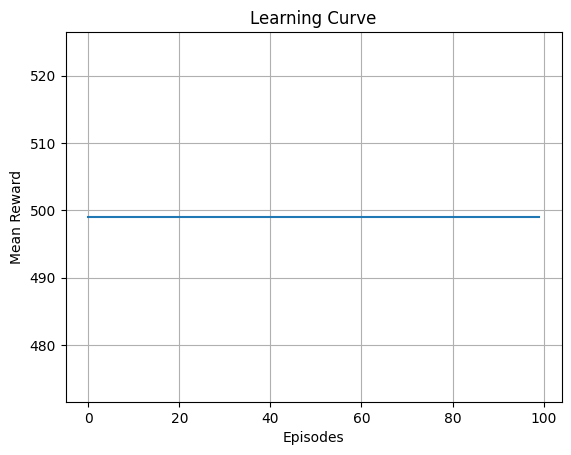

In [76]:
def plot_learning_curve(rewards):
    plt.plot(range(len(rewards)), rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Mean Reward')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

# Plot the learning curve
plot_learning_curve(mean_reward)

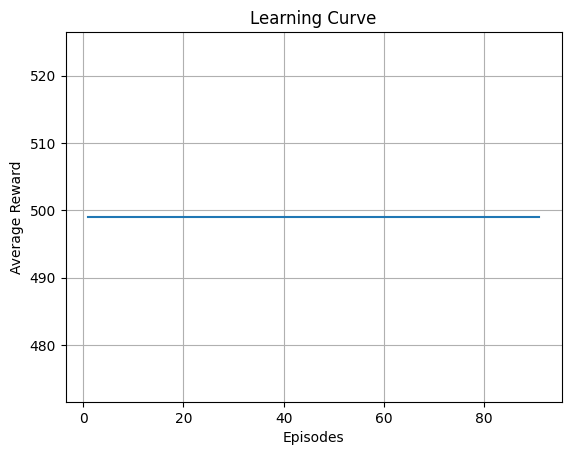

In [78]:
def plot_learning_curve(rewards, window_size=10):
    """
    Plot the learning curve.

    Args:
        rewards (list): List of rewards obtained in each episode or time step.
        window_size (int): Size of the moving average window for smoothing.

    Returns:
        None
    """
    # Calculate the moving average of rewards
    moving_avg_rewards = []
    for i in range(len(rewards) - window_size + 1):
        moving_avg_rewards.append(sum(rewards[i:i+window_size]) / window_size)

    # Plot the learning curve
    plt.plot(range(1, len(moving_avg_rewards) + 1), moving_avg_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Average Reward')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

# Example usage
# Assuming 'rewards' is a list containing rewards obtained in each episode or time step
plot_learning_curve(mean_reward, window_size=10)

ActorCriticPolicy(
  (features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (pi_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (vf_features_extractor): FlattenExtractor(
    (flatten): Flatten(start_dim=1, end_dim=-1)
  )
  (mlp_extractor): MlpExtractor(
    (policy_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
    (value_net): Sequential(
      (0): Linear(in_features=4, out_features=64, bias=True)
      (1): Tanh()
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): Tanh()
    )
  )
  (action_net): Linear(in_features=64, out_features=2, bias=True)
  (value_net): Linear(in_features=64, out_features=1, bias=True)
)